<a href="https://colab.research.google.com/github/manushi0304/Project/blob/main/cyberanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Global_Cybersecurity_Threats_2015-2024.csv to Global_Cybersecurity_Threats_2015-2024.csv


In [ ]:
import pandas as pd
df = pd.read_csv("Global_Cybersecurity_Threats_2015-2024.csv")
df.head()


,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [ ]:
df.info()

# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

# Statistical summary for numeric columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB
Missing values in each column:
Countr

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


In [ ]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

# Confirm that missing values have been handled
print('Missing values after cleaning:')
print(df.isnull().sum())

Missing values after cleaning:
Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64


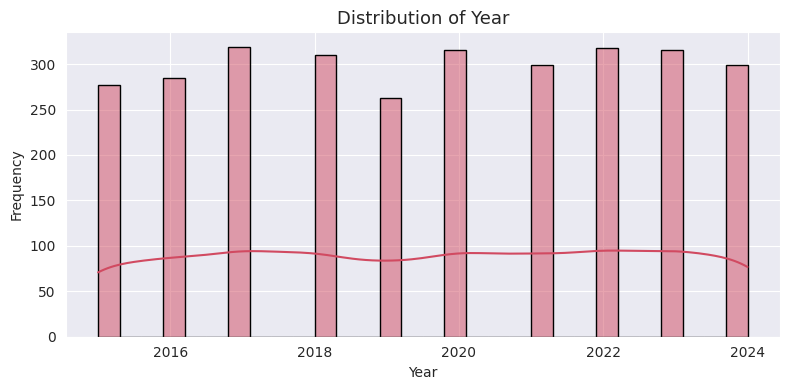

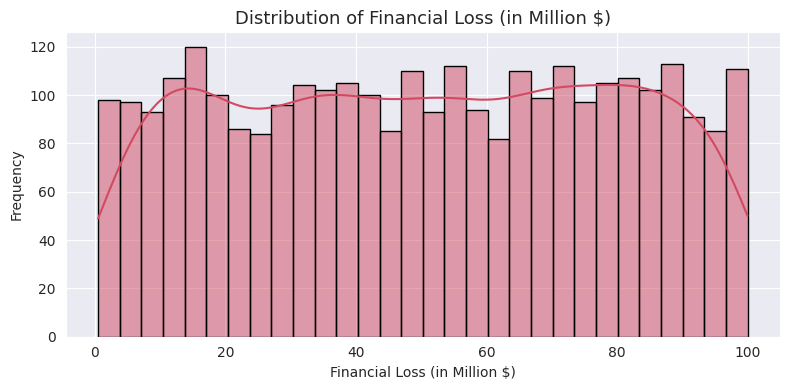

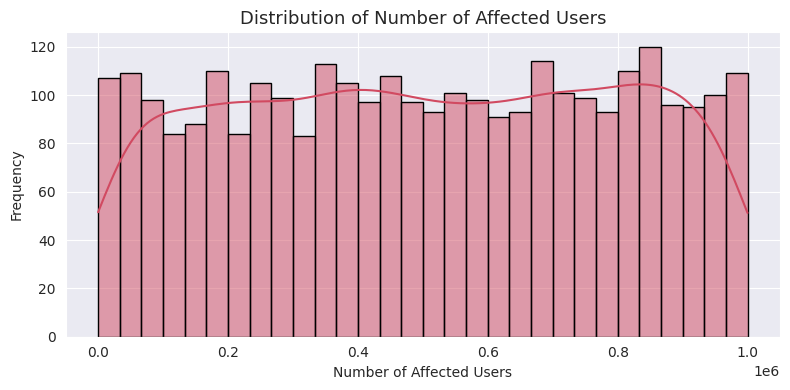

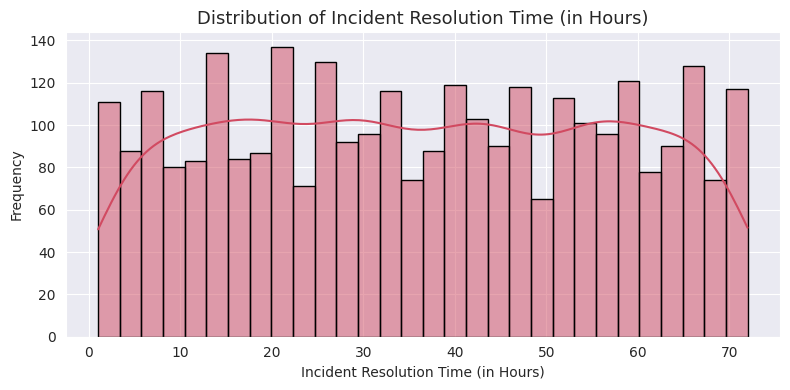

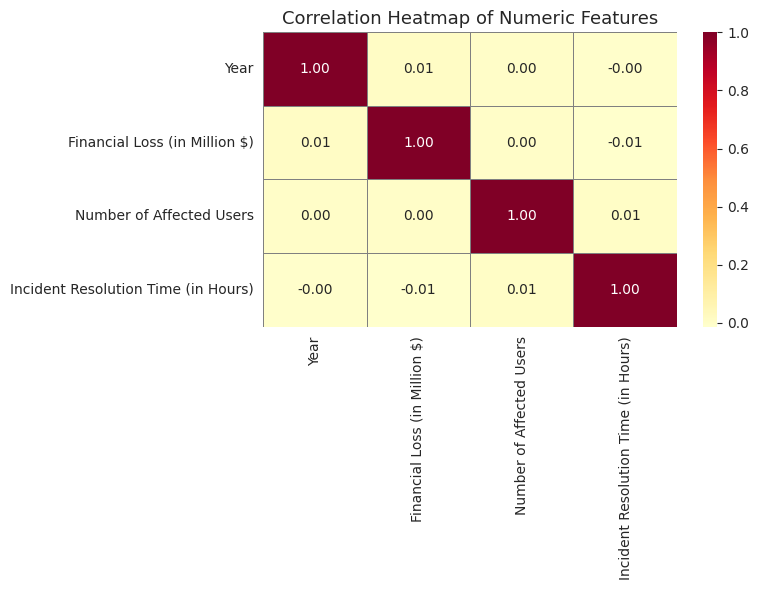

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')

numeric_cols = ['Year', 'Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']

# Warm-tone histograms
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color=sns.color_palette("flare", 6)[2], edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=13)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Warm-tone correlation heatmap
numeric_df = df[numeric_cols]
if len(numeric_df.columns) >= 4:
    plt.figure(figsize=(8, 6))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='YlOrRd', fmt='.2f', linewidths=0.5, linecolor='gray')
    plt.title('Correlation Heatmap of Numeric Features', fontsize=13)
    plt.tight_layout()
    plt.show()


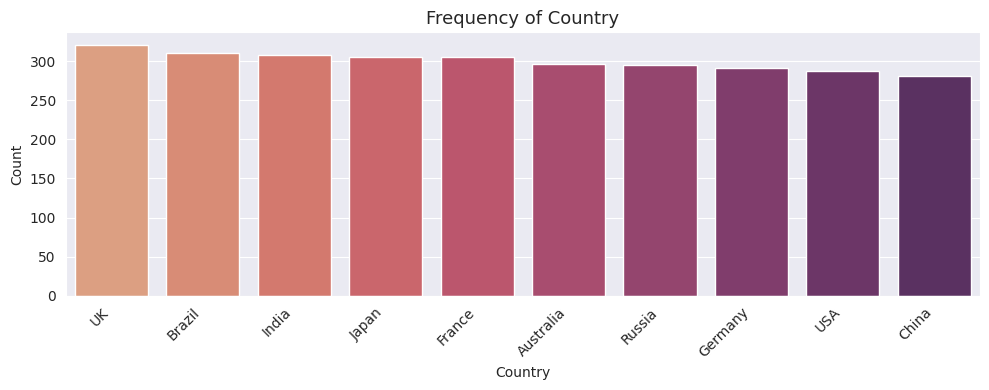

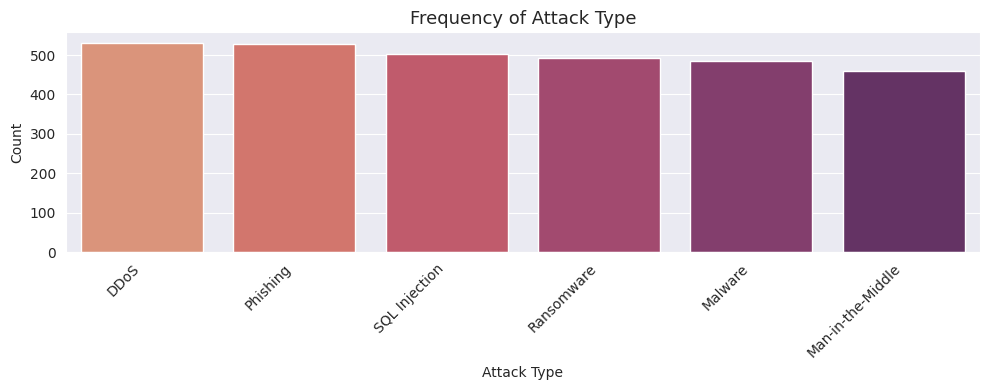

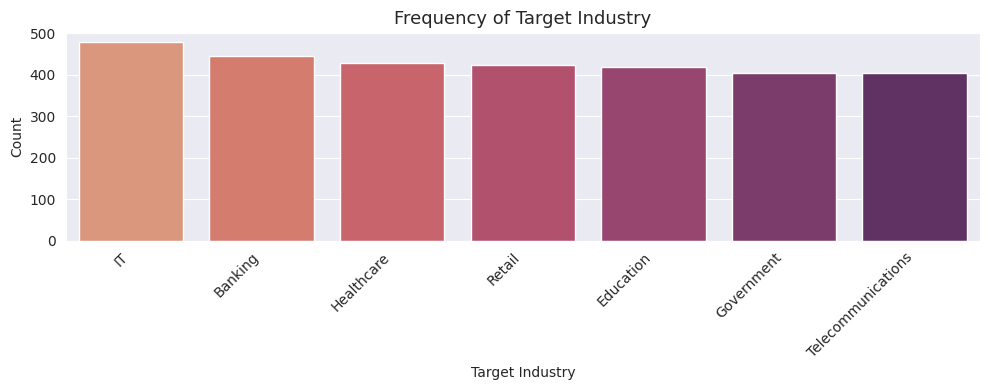

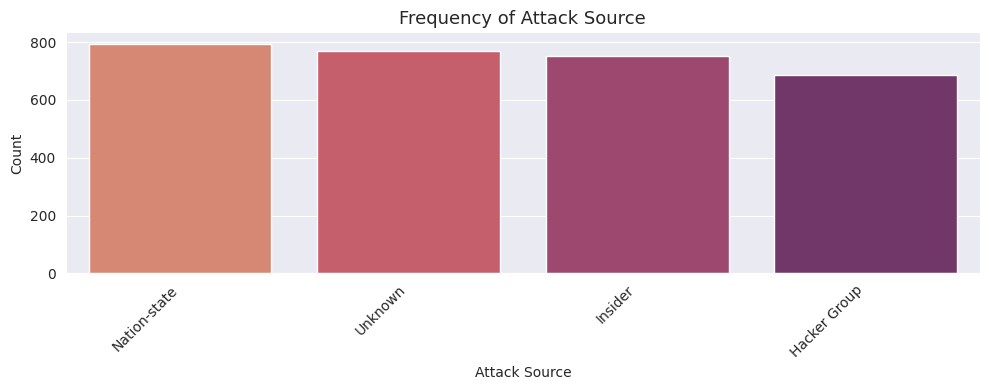

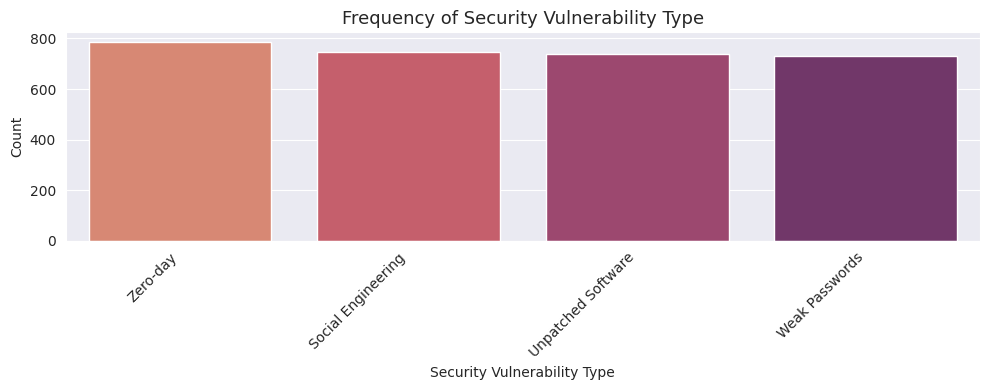

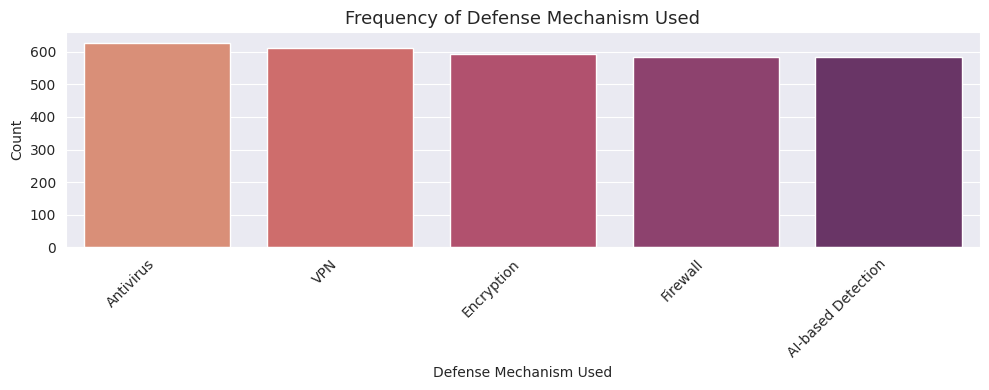

In [ ]:
categorical_cols = ['Country', 'Attack Type', 'Target Industry', 'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    order = df[col].value_counts().index
    colors = sns.color_palette("flare", n_colors=len(order))  # Generate warm tones
    sns.countplot(data=df, x=col, order=order, palette=colors)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Frequency of {col}', fontsize=13)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

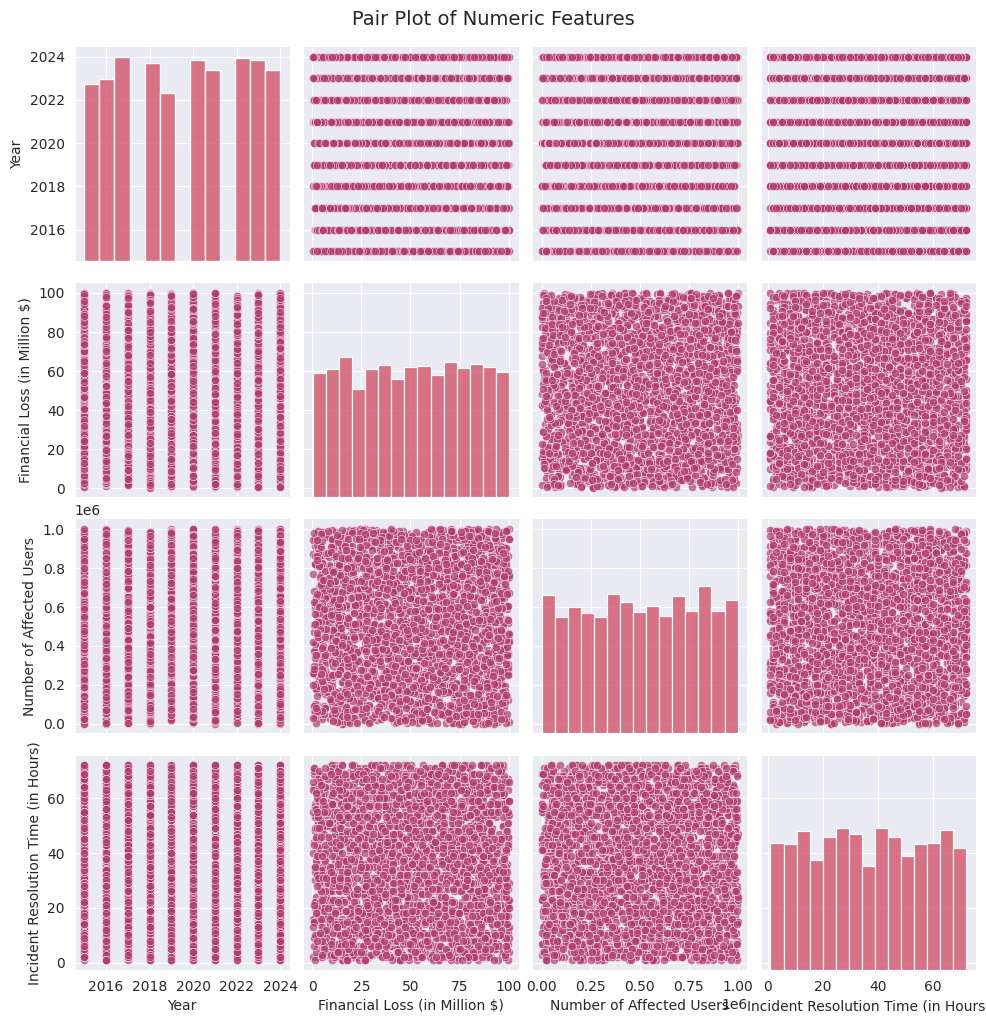

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set warm-tone style
sns.set_style("darkgrid")

# Create pairplot with warm diagonal histograms and scatter colors
pairplot = sns.pairplot(numeric_df,
                        diag_kws={'color': sns.color_palette("flare")[2], 'fill': True},
                        plot_kws={'color': sns.color_palette("flare")[3], 'alpha': 0.7})

# Add title
pairplot.fig.suptitle('Pair Plot of Numeric Features', y=1.02, fontsize=14)
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Assuming df is your DataFrame
df_country_loss = df.groupby('Country')['Financial Loss (in Million $)'].sum().reset_index()

# Create the choropleth map
fig = px.choropleth(
    df_country_loss,
    locations='Country',
    locationmode='country names',
    color='Financial Loss (in Million $)',
    color_continuous_scale='Inferno',
    title='Total Financial Loss by Country'
)

# Improve the layout with larger size
fig.update_layout(
    geo=dict(
        showframe=True,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    width=1000,  # Adjust width as needed
    height=600,   # Adjust height as needed
    margin=dict(l=0, r=0, t=50, b=0)  # Adjust margins if needed
)

fig.show()

In [ ]:
# First, let's clean the attack type data
# Assuming df has columns 'Country' and 'Attack Type'

# Step 1: Clean and standardize attack types
# Define the main attack types
main_attack_types = [
    'Phishing',
    'DDoS',
    'SQL Injection',
    'Malware',
    'Ransomware',
    'Man-in-the-Middle'
]

# Function to categorize attacks into standard types
def categorize_attack(attack_string):
    for attack_type in main_attack_types:
        if attack_type.lower() in attack_string.lower():
            return attack_type
    return 'Other'

# Apply the function to create a new standardized column
df['Standardized Attack Type'] = df['Attack Type'].apply(categorize_attack)

# Step 2: Create a choropleth for each attack type with larger size
for attack_type in main_attack_types:
    # Filter data for this attack type
    attack_df = df[df['Standardized Attack Type'] == attack_type]

    # Count attacks by country
    country_attack_count = attack_df.groupby('Country').size().reset_index(name='Attack Count')

    # Create choropleth map with larger size
    fig = px.choropleth(
        country_attack_count,
        locations='Country',
        locationmode='country names',
        color='Attack Count',
        color_continuous_scale='Reds',
        title=f'Number of {attack_type} Attacks by Country',
        width=1000,  # Set width
        height=600   # Set height
    )

    fig.update_layout(
        geo=dict(
            showframe=True,
            showcoastlines=True,
            projection_type='equirectangular'
        ),
        margin=dict(l=0, r=0, t=50, b=0)  # Adjust margins to maximize map area
    )

    fig.show()

# Step 3: Create a choropleth for total attacks (all types) with larger size
total_attacks_by_country = df.groupby('Country').size().reset_index(name='Total Attacks')

fig = px.choropleth(
    total_attacks_by_country,
    locations='Country',
    locationmode='country names',
    color='Total Attacks',
    color_continuous_scale='Reds',
    title='Total Cyber Attacks by Country',
    width=1000,  # Set width
    height=600   # Set height
)

fig.update_layout(
    geo=dict(
        showframe=True,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    margin=dict(l=0, r=0, t=50, b=0)  # Adjust margins to maximize map area
)

fig.show()

In [ ]:
# Create a grouped bar chart for top 10 countries by attack frequency
attack_counts = df.groupby(['Country', 'Standardized Attack Type']).size().reset_index(name='Count')

# Get top 10 countries by total attacks
top_countries = total_attacks_by_country.sort_values('Total Attacks', ascending=False).head(10)['Country'].tolist()

# Filter for just these countries
top_country_attacks = attack_counts[attack_counts['Country'].isin(top_countries)]

# Create bar chart
fig = px.bar(
    top_country_attacks,
    x='Country',
    y='Count',
    color='Standardized Attack Type',
    title='Cyber Attack Types by Country (Top 10 Countries)',
    barmode='group'
)

fig.show()

In [ ]:
# Define the target variable and predictors
target = 'Financial Loss (in Million $)'
predictors = ['Year', 'Number of Affected Users', 'Incident Resolution Time (in Hours)',
              'Attack Type', 'Target Industry', 'Attack Source']

X = df[predictors]
y = df[target]

# Identify categorical and numerical columns
categorical_features = ['Attack Type', 'Target Industry', 'Attack Source']
numerical_features = ['Year', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']

# Check scikit-learn version to use the correct parameter
import sklearn
sklearn_version = sklearn.__version__
print(f"scikit-learn version: {sklearn_version}")

# Create Column Transformer to one-hot encode categorical features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Use appropriate parameters based on sklearn version
if int(sklearn_version.split('.')[0]) == 0 and int(sklearn_version.split('.')[1]) < 22:
    # For older versions
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first', sparse=False), categorical_features)],
        remainder='passthrough')
else:
    # For newer versions (0.22+)
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)],
        remainder='passthrough')

# Create a pipeline with the preprocessor and a linear regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('Linear Regression Model Performance:')
print(f'R² Score: {r2:.3f}')
print(f'Mean Squared Error: {mse:.3f}')
print(f'Mean Absolute Error: {mae:.3f}')

scikit-learn version: 1.6.1
Linear Regression Model Performance:
R² Score: -0.005
Mean Squared Error: 812.763
Mean Absolute Error: 24.629


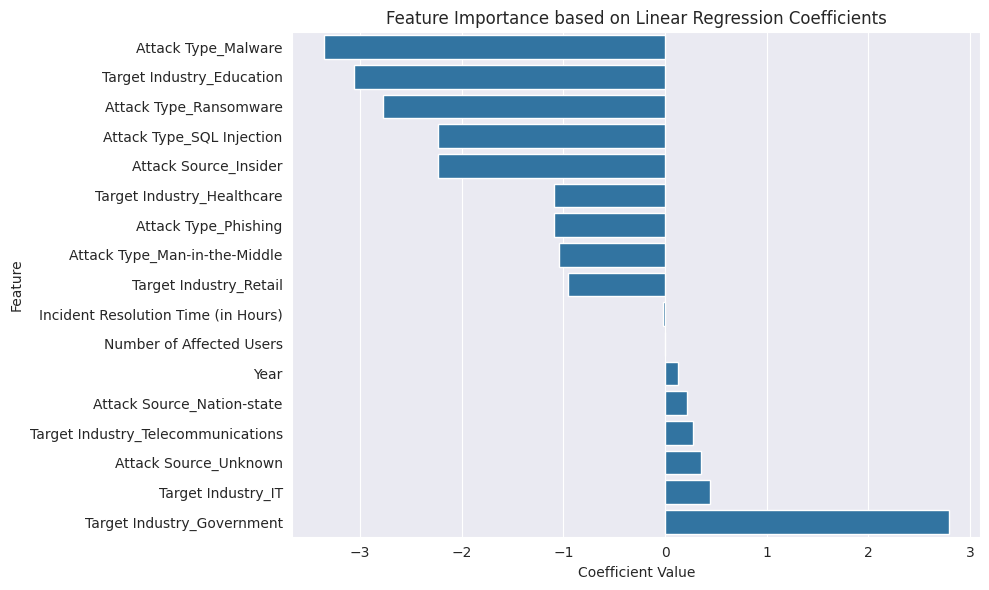

In [ ]:
ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat']
ohe_features = list(ohe.get_feature_names_out(categorical_features))
all_features = ohe_features + numerical_features

# Retrieve model coefficients
coefficients = pipeline.named_steps['model'].coef_

# Plotting the feature importance
feature_importance = pd.Series(coefficients, index=all_features).sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, orient='h')
plt.title('Feature Importance based on Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

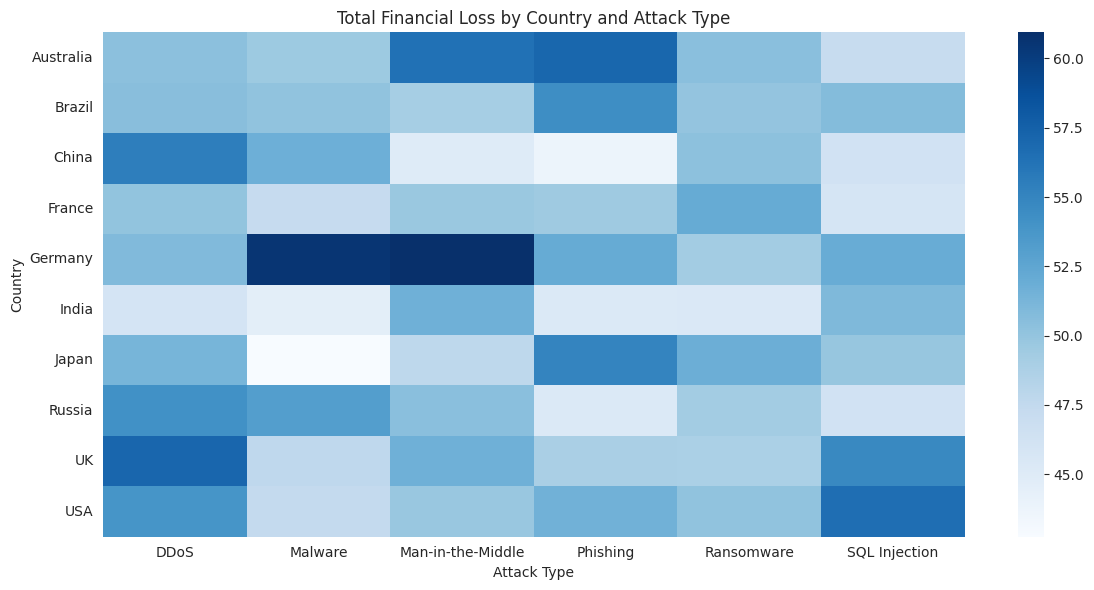

In [ ]:
pivot_table = df.pivot_table(index='Country', columns='Attack Type', values='Financial Loss (in Million $)')

# Plot the Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='Blues')
plt.xlabel("Attack Type")
plt.ylabel("Country")
plt.title("Total Financial Loss by Country and Attack Type")
plt.tight_layout()
plt.show()

In [ ]:
# Group by year and attack type
attack_type_trends = df.groupby(['Year', 'Attack Type']).size().reset_index(name='Count')

# Create the line chart
fig = px.line(
    attack_type_trends,
    x='Year',
    y='Count',
    color='Attack Type',
    title='Frequency of Attack Types Over Time',
    labels={'Year': 'Year', 'Count': 'Frequency'},
    markers=True
)

# Center title and ensure all years are shown
fig.update_layout(
    title_x=0.5,
    xaxis=dict(tickmode='linear')
)

# Remove the renderer parameter for Google Colab
fig.show()